In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import warnings

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

#### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.columns = [df.columns[col_name].lower().replace(' ','_') for col_name in range(len(df.columns))]
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
df.set_index('customer', inplace=True)
df.head(10)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize


In [8]:
df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

Changing effective to date format

In [9]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'], errors='coerce')

Column policy has data from policy type so we remove it 

In [10]:
for i in range(len(df['policy'])):
    df['policy'][i] = df['policy'][i].split()[1]

Check the consistency of categorical values


In [11]:
for col in df.select_dtypes(np.object).columns:
    print("Unique entires for", col.upper(), "are:", df[col].unique())

Unique entires for STATE are: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique entires for RESPONSE are: ['No' 'Yes']
Unique entires for COVERAGE are: ['Basic' 'Extended' 'Premium']
Unique entires for EDUCATION are: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique entires for EMPLOYMENTSTATUS are: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique entires for GENDER are: ['F' 'M']
Unique entires for LOCATION_CODE are: ['Suburban' 'Rural' 'Urban']
Unique entires for MARITAL_STATUS are: ['Married' 'Single' 'Divorced']
Unique entires for POLICY_TYPE are: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique entires for POLICY are: ['L3' 'L2' 'L1']
Unique entires for RENEW_OFFER_TYPE are: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
Unique entires for SALES_CHANNEL are: ['Agent' 'Call Center' 'Web' 'Branch']
Unique entires for VEHICLE_CLASS are: ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
Unique entires f

#### EDA

In [12]:
df.describe().round(2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00,9134.00
mean,8004.94,37657.38,93.22,15.10,48.06,0.38,2.97,434.09
std,6870.97,30379.90,34.41,10.07,27.91,0.91,2.39,290.50
min,1898.01,0.00,61.00,0.00,0.00,0.00,1.00,0.10
25%,3994.25,0.00,68.00,6.00,24.00,0.00,1.00,272.26
50%,5780.18,33889.50,83.00,14.00,48.00,0.00,2.00,383.95
75%,8962.17,62320.00,109.00,23.00,71.00,0.00,4.00,547.51
max,83325.38,99981.00,298.00,35.00,99.00,5.00,9.00,2893.24


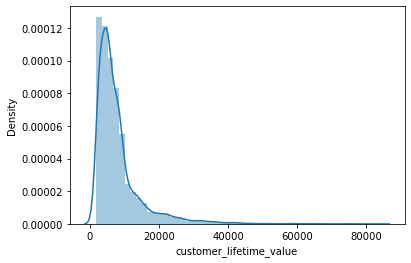

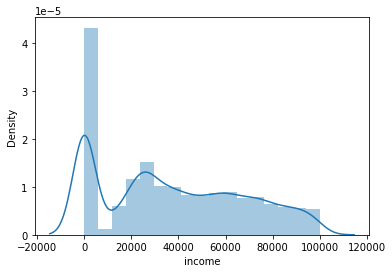

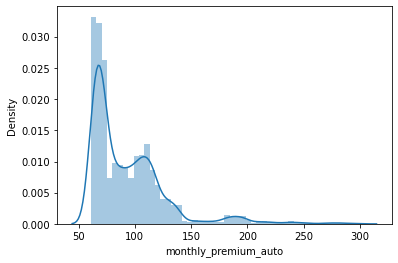

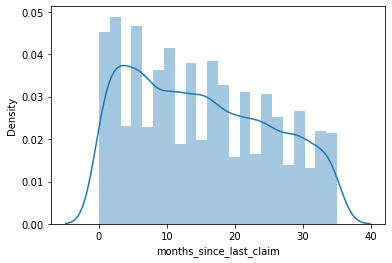

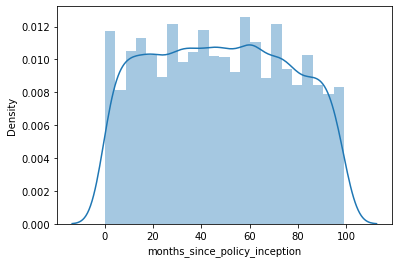

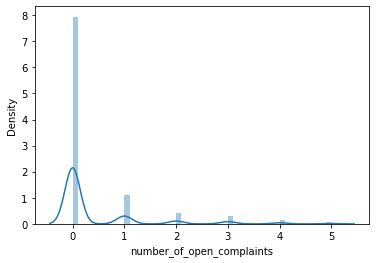

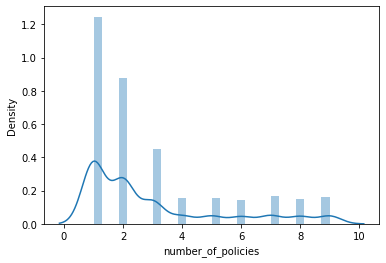

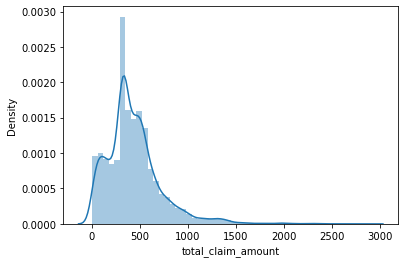

In [16]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column], )
    plt.show()

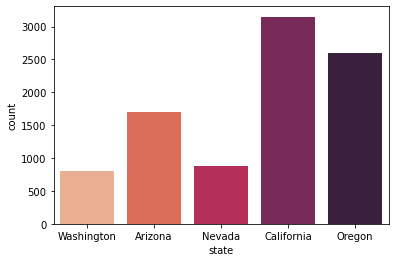

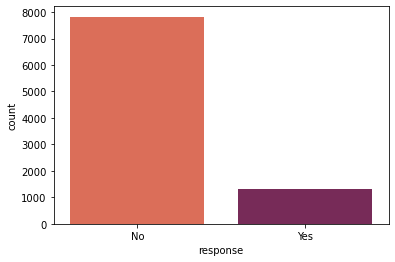

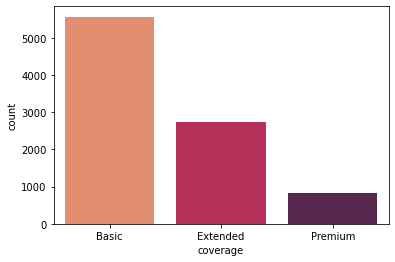

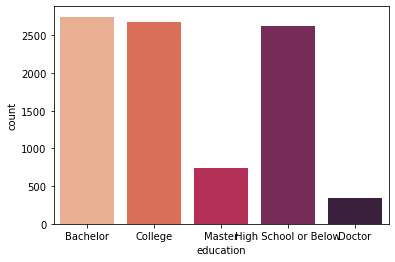

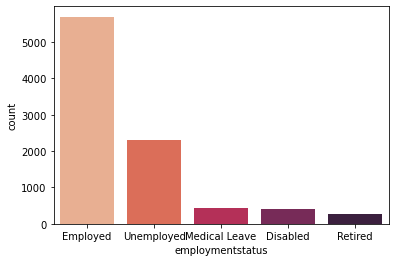

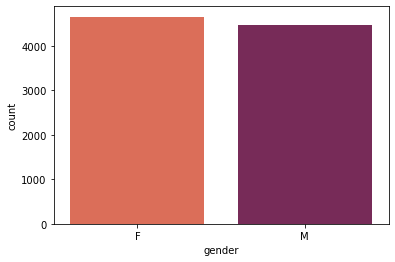

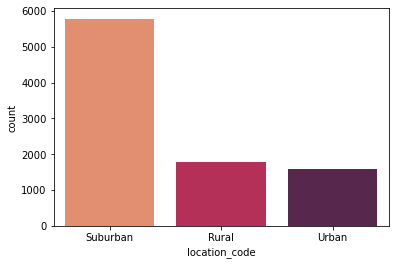

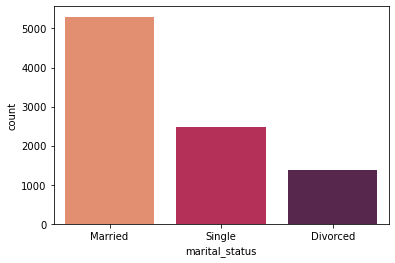

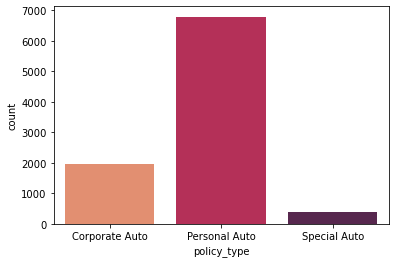

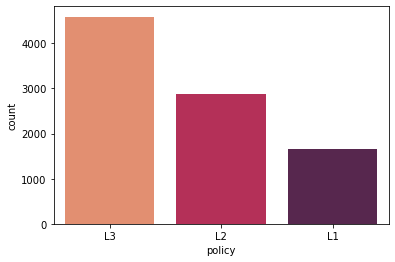

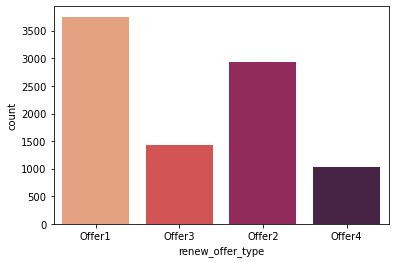

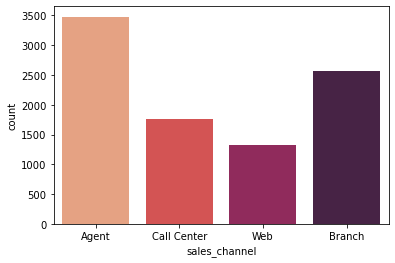

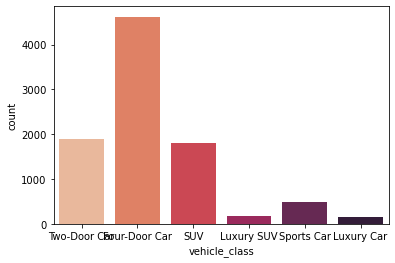

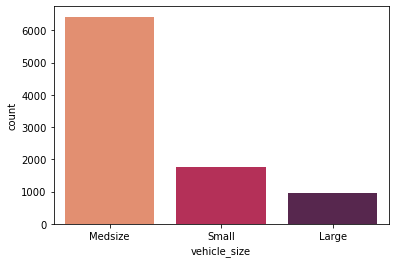

In [17]:
for col in df.select_dtypes(np.object).columns:
    sns.countplot(x=df[col], palette='rocket_r') #, hue=df['education']
    plt.show()

In [18]:
corr_mat = df.corr(method='spearman')
corr_mat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.055395,0.453933,0.005126,-0.002429,-0.031312,0.488860,0.210598
income,0.055395,1.000000,-0.017608,-0.025784,-0.001945,0.006334,-0.010273,-0.401598
monthly_premium_auto,0.453933,-0.017608,1.000000,-0.005989,0.014596,-0.012751,-0.006936,0.522261
months_since_last_claim,0.005126,-0.025784,-0.005989,1.000000,-0.048269,0.005736,0.011439,-0.000782
months_since_policy_inception,-0.002429,-0.001945,0.014596,-0.048269,1.000000,-0.013233,-0.009546,-0.006569
number_of_open_complaints,-0.031312,0.006334,-0.012751,0.005736,-0.013233,1.000000,0.001523,-0.024694
number_of_policies,0.488860,-0.010273,-0.006936,0.011439,-0.009546,0.001523,1.000000,-0.011100
total_claim_amount,0.210598,-0.401598,0.522261,-0.000782,-0.006569,-0.024694,-0.011100,1.000000


Plot Correlaction

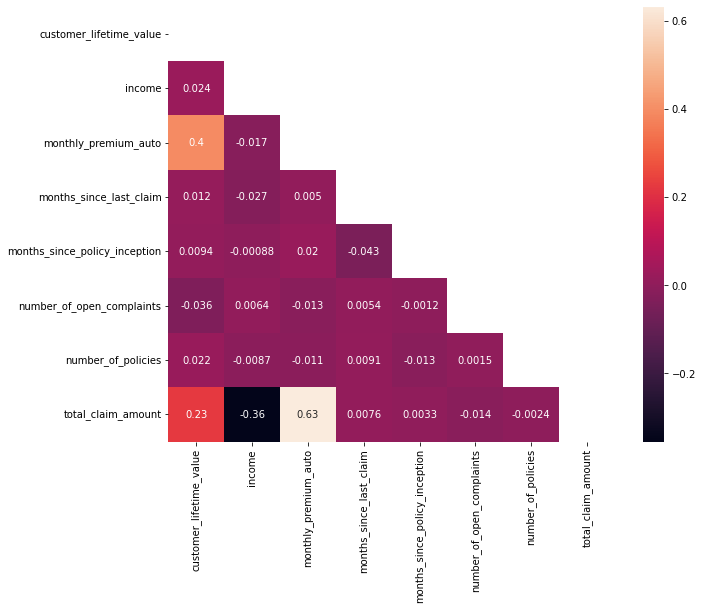

In [19]:
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


<AxesSubplot:ylabel='effective_to_date'>

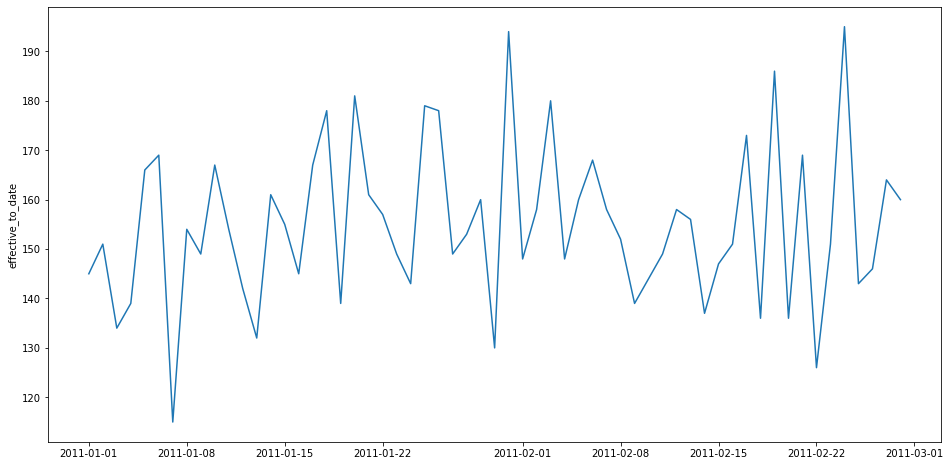

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=df['effective_to_date'].unique(), y=df['effective_to_date'].value_counts())

#### Data cleaning and wrangling

 removing outliers

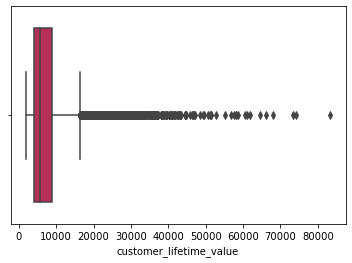

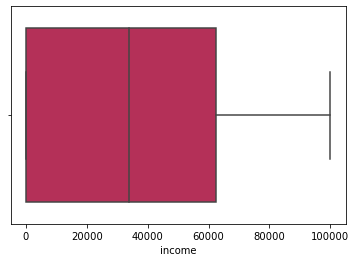

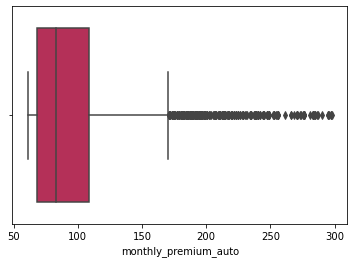

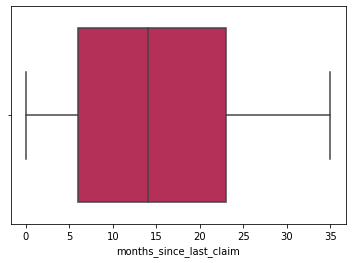

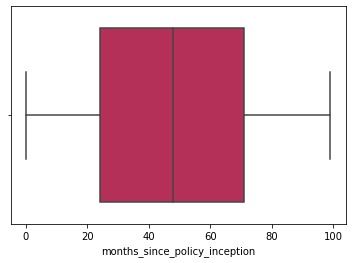

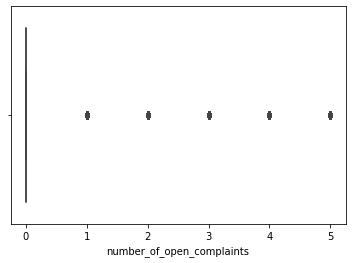

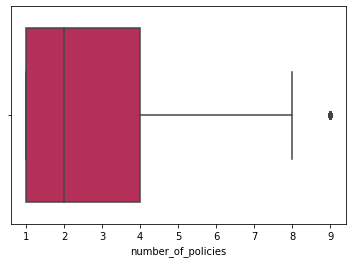

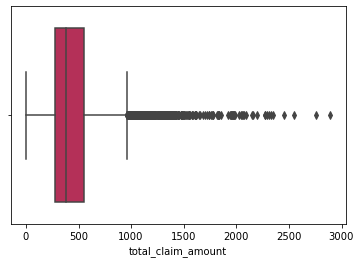

In [21]:
for column in df.select_dtypes(include='number').columns:
    sns.boxplot(df[column],palette='rocket_r')
    plt.show()

In [23]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(include='number').columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>=lower_limit) & (df[column]<=upper_limit)]
    return df

2) Create a copy of the dataframe for the data wrangling.

In [24]:
print(len(df), "original columns")

df1 = df.copy()

df1 = remove_outliers(df1, threshold=2.5)

print(len(df1), "columns after removing outliers")
print(round((1-(len(df1)/len(df)))*100,1), "% of total data loss")

9134 original columns
6664 columns after removing outliers
27.0 % of total data loss


In [25]:
print(len(df1), "initial columns")

df2 = remove_outliers(df1, threshold=1.5, in_columns=['income', 'monthly_premium_auto', 'total_claim_amount'])
# now filter the outliers on the more important columns with a tighter threshold

print(len(df2), "columns after removing outliers")
print(round((1-(len(df2)/len(df)))*100,1), "% of total data loss")

6664 initial columns
6389 columns after removing outliers
30.1 % of total data loss


4) Encode categorical variables.


In [28]:
df2["coverage"] = df2["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

df2["education"] = df2["education"].map({
    "High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" : 3, "Doctor" : 4})

df2["location_code"] = df2["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})

df2["vehicle_size"] = df2["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6389 entries, BU79786 to Y167826
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          6389 non-null   object 
 1   customer_lifetime_value        6389 non-null   float64
 2   response                       6389 non-null   object 
 3   coverage                       6389 non-null   int64  
 4   education                      6389 non-null   int64  
 5   employmentstatus               6389 non-null   object 
 6   gender                         6389 non-null   object 
 7   income                         6389 non-null   int64  
 8   location_code                  6389 non-null   int64  
 9   marital_status                 6389 non-null   object 
 10  monthly_premium_auto           6389 non-null   int64  
 11  months_since_last_claim        6389 non-null   int64  
 12  months_since_policy_inception  6389 non-null

5) The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [27]:
df2['day'] = df2['effective_to_date'].dt.day

df2['week'] = df2['effective_to_date'].dt.week

df2['month'] = df2['effective_to_date'].dt.month

df2.drop(['effective_to_date'], axis=1, inplace=True)

df2.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,week,month
customer,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2
OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,L3,Offer2,Web,159.383042,Two-Door Car,Medsize,25,4,1
